In [297]:
import requests
import json
import pandas as pd
import os

In [298]:
r= requests.get('https://www.ohioeventfinder.com/api/55f73332-374b-4146-958d-fcdb9b25eb1d/places?p=public-art&__other=/home/cma-production/columbusmakesart.com/current/web/public-art&types%5B%5D=Public+Art&page=1&size=100000')

In [299]:
j = r.json()

In [300]:
len(j)

1623

In [301]:
test = r.json()[0]

In [302]:
test.keys()

dict_keys(['id', 'permalink', 'name', 'full_street_address', 'city', 'state', 'zip', 'county', 'address_1', 'address_2', 'latitude', 'longitude', 'website', 'area', 'profile_image', 'place_categories', 'place_type', 'place_attributes', 'artists', 'year_made', 'no_longer_on_display', 'neighborhoods'])

In [303]:
#df = pd.read_json(data)

In [304]:
df = pd.DataFrame(j)
df = df.set_index("id")      #sets index
df.head(10)

,permalink,name,full_street_address,city,state,zip,county,address_1,address_2,latitude,...,website,area,profile_image,place_categories,place_type,place_attributes,artists,year_made,no_longer_on_display,neighborhoods
id,,,,,,,,,,,,,,,,,,,,,
10255,10255-herbie-and-goose,Herbie and Goose,"4850 W. Powell Rd , Powell, OH, 43065",Powell,OH,43065,Delaware,4850 W. Powell Rd,,40.1561,...,,"{'id': 1, 'name': 'Columbus'}","{'id': 3879, 'name': 'Herbie_and_Goose.jpg', '...","[{'id': 2, 'name': 'Sculpture'}]","{'id': 2, 'name': 'Public Art'}","[{'id': 3, 'name': 'Wheelchair Accessible'}, {...",[],1980.0,False,[]
10111,10111-honey-bees-flowers,Honey Bees & Flowers,"3 East Columbus Street, Lithopolis, Ohio, 43136",Lithopolis,Ohio,43136,Fairfield,3 East Columbus Street,,39.8035,...,https://visitfairfieldcounty.org/listing/honey...,"{'id': 1, 'name': 'Columbus'}","{'id': 3559, 'name': 'Honey_Bees_and_Flowers-c...","[{'id': 1, 'name': 'Mural'}]","{'id': 2, 'name': 'Public Art'}","[{'id': 2, 'name': 'Street Parking'}, {'id': 9...",[],NaN,False,"[{'id': 21, 'permalink': '21-lithopolis', 'nam..."
9987,9987-934-mural-mentorship-program-group-mural-...,"""934 Mural Mentorship Program Group Mural"" (93...","926 Cleveland Ave, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,926 Cleveland Ave,,39.9830,...,https://www.934fest.com/muralists/,"{'id': 1, 'name': 'Columbus'}","{'id': 3293, 'name': 'Mural_Mentorship_Mentees...","[{'id': 1, 'name': 'Mural'}]","{'id': 2, 'name': 'Public Art'}",[],[],NaN,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na..."
9973,9973-a-hero-in-darkness-934-outdoor-gallery,"""A Hero in Darkness"" (934 Outdoor Gallery)","934 Cleveland Ave, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,934 Cleveland Ave,,39.9831,...,https://www.934fest.com/muralists/,"{'id': 1, 'name': 'Columbus'}","{'id': 3277, 'name': 'Andy_Smith.jpg', 'descri...","[{'id': 1, 'name': 'Mural'}]","{'id': 2, 'name': 'Public Art'}",[],"[{'first_name': 'Andy', 'middle_name': '', 'la...",NaN,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na..."
9989,9989-arise-934-outdoor-gallery,"""ARISE"" (934 Outdoor Gallery)","934 Cleveland Ave, Garage, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,934 Cleveland Ave,Garage,39.9831,...,https://www.934fest.com/muralists/,"{'id': 1, 'name': 'Columbus'}","{'id': 3295, 'name': 'Sarah_Hout.jpg', 'descri...","[{'id': 1, 'name': 'Mural'}]","{'id': 2, 'name': 'Public Art'}","[{'id': 1, 'name': 'Free Parking'}, {'id': 3, ...","[{'first_name': 'Sarah', 'middle_name': '', 'l...",NaN,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na..."
9994,9994-ahmed-and-max-934-outdoor-gallery,"""Ahmed and Max"" (934 Outdoor Gallery)","579 E 3rd Ave, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,579 E 3rd Ave,,39.9833,...,https://www.934fest.com/muralists/,"{'id': 1, 'name': 'Columbus'}","{'id': 3300, 'name': 'Natalie_Steigman_Gall.jp...","[{'id': 1, 'name': 'Mural'}]","{'id': 2, 'name': 'Public Art'}",[],"[{'first_name': 'Natalie', 'middle_name': '', ...",NaN,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na..."
9972,9972-always-coming-back-home-to-you-934-outdoo...,"""Always Coming Back Home to You""- (934 Outdoor...","934 Cleveland Ave, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,934 Cleveland Ave,,39.9831,...,https://www.934fest.com/muralists/,"{'id': 1, 'name': 'Columbus'}","{'id': 3274, 'name': 'Monster_Steve.jpg', 'des...","[{'id': 1, 'name': 'Mural'}]","{'id': 2, 'name': 'Public Art'}",[],"[{'first_name': 'Monster', 'middle_name': 'Ste...",NaN,False,"[{'id': 25, 'permalink': '25-milo-grogan', 'na..."
9978,9978-at-ease-934-outdoor-gallery,"""At Ease"" (934 Outdoor Gallery)","926 Cleveland Ave, Columbus, OH, 43219",Columbus,OH,43219,Franklin,926 Cleveland Ave,,39.9830,...,https://www.934fest.com/muralists/,"{'id': 1, 'name': 'Columbus'}","{'id': 3282, 'name': 'Francesca_Miller.jpg', '...","[{'id': 1, 'name': 'Mural'}]","{'id': 2, 'name': 'Public Art'}","[{'id': 1, 'name': 'Free Parking'}, {'id': 9, ...","[{'fi

In [305]:
def dict_list_to_df(df, col):
    """Return a Pandas dataframe based on a column that contains a list of JSON objects or dictionaries.
    Arguments:
        df (Pandas dataframe): The dataframe to be flattened.
        col (str): The name of the column that contains the JSON objects or dictionaries.
    Returns:
        Pandas dataframe: A new dataframe with the JSON objects or dictionaries expanded into columns.
    """

    rows = []
    for index, row in df[col].iteritems():
        for item in row:
            rows.append(item)
    df = pd.DataFrame(rows)
    return df

In [306]:
def dict_to_df(df, col):
    """Return a Pandas dataframe based on a column that contains a list of JSON objects or dictionaries.
    Arguments:
        df (Pandas dataframe): The dataframe to be flattened.
        col (str): The name of the column that contains the JSON objects or dictionaries.
    Returns:
        Pandas dataframe: A new dataframe with the JSON objects or dictionaries expanded into columns.
    """

    rows = []
    for index, row in df[col].iteritems():
            rows.append(row)
    df = pd.DataFrame(rows)
    return df

In [307]:
place_categories = dict_list_to_df(df, "place_categories")
place_type = dict_to_df(df, "place_type")

In [308]:
place_categories = place_categories.drop(['id'], axis=1)
place_type = place_type.drop(['id'], axis=1)

In [309]:
place_cat = place_categories.rename(columns={"name": "category"})
place_type = place_type.rename(columns={"name": "type"})

In [313]:
df2 = df.join(place_cat)
df3 = df2.join(place_type)
#df3 = df3.set_index("id") #sets index

In [314]:
df5 = df4.drop(['place_categories', 'profile_image', 'area', 'place_type' ], axis=1) #do not need these varibles 
df5['year_made'] = df5['year_made'].astype(str)          
df5['year_made'] = df5['year_made'].str.replace('.0', ' ', regex=False)

In [315]:
df5.head(5)

,permalink,name,full_street_address,city,state,zip,county,address_1,address_2,latitude,longitude,website,place_attributes,artists,year_made,no_longer_on_display,neighborhoods,category,type
id,,,,,,,,,,,,,,,,,,,
10255,10255-herbie-and-goose,Herbie and Goose,"4850 W. Powell Rd , Powell, OH, 43065",Powell,OH,43065,Delaware,4850 W. Powell Rd,,40.1561,-83.1183,,"[{'id': 3, 'name': 'Wheelchair Accessible'}, {...",[],1980,False,[],Sculpture,Public Art
10111,10111-honey-bees-flowers,Honey Bees & Flowers,"3 East Columbus Street, Lithopolis, Ohio, 43136",Lithopolis,Ohio,43136,Fairfield,3 East Columbus Street,,39.8035,-82.8084,https://visitfairfieldcounty.org/listing/honey...,"[{'id': 2, 'name': 'Street Parking'}, {'id': 9...",[],nan,False,"[{'id': 21, 'permalink': '21-lithopolis', 'nam...",Mural,Public Art
9987,9987-934-mural-mentorship-program-group-mural-...,"""934 Mural Mentorship Program Group Mural"" (93...","926 Cleveland Ave, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,926 Cleveland Ave,,39.9830,-82.9891,https://www.934fest.com/muralists/,[],[],nan,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na...",Mural,Public Art
9973,9973-a-hero-in-darkness-934-outdoor-gallery,"""A Hero in Darkness"" (934 Outdoor Gallery)","934 Cleveland Ave, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,934 Cleveland Ave,,39.9831,-82.9892,https://www.934fest.com/muralists/,[],"[{'first_name': 'Andy', 'middle_name': '', 'la...",nan,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na...",Mural,Public Art
9989,9989-arise-934-outdoor-gallery,"""ARISE"" (934 Outdoor Gallery)","934 Cleveland Ave, Garage, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,934 Cleveland Ave,Garage,39.9831,-82.9892,https://www.934fest.com/muralists/,"[{'id': 1, 'name': 'Free Parking'}, {'id': 3, ...","[{'first_name': 'Sarah', 'middle_name': '', 'l...",nan,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na...",Mural,Public Art


In [316]:
df_filter = df5[df5['county'].isin(['Franklin'])] #N=1524
df_filter1 = df_filter[df_filter['category'].isin(['Mural', 'Sculpture', 'Statue'])] #N=825

In [317]:
df_filter1.head(3)

,permalink,name,full_street_address,city,state,zip,county,address_1,address_2,latitude,longitude,website,place_attributes,artists,year_made,no_longer_on_display,neighborhoods,category,type
id,,,,,,,,,,,,,,,,,,,
9987,9987-934-mural-mentorship-program-group-mural-...,"""934 Mural Mentorship Program Group Mural"" (93...","926 Cleveland Ave, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,926 Cleveland Ave,,39.9830,-82.9891,https://www.934fest.com/muralists/,[],[],nan,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na...",Mural,Public Art
9973,9973-a-hero-in-darkness-934-outdoor-gallery,"""A Hero in Darkness"" (934 Outdoor Gallery)","934 Cleveland Ave, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,934 Cleveland Ave,,39.9831,-82.9892,https://www.934fest.com/muralists/,[],"[{'first_name': 'Andy', 'middle_name': '', 'la...",nan,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na...",Mural,Public Art
9989,9989-arise-934-outdoor-gallery,"""ARISE"" (934 Outdoor Gallery)","934 Cleveland Ave, Garage, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,934 Cleveland Ave,Garage,39.9831,-82.9892,https://www.934fest.com/muralists/,"[{'id': 1, 'name': 'Free Parking'}, {'id': 3, ...","[{'first_name': 'Sarah', 'middle_name': '', 'l...",nan,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na...",Mural,Public Art


In [318]:
year_list = df_filter1['year_made'].tolist()
with_year= df_filter1[~df_filter1['year_made'].isin(['nan'])]
with_year['year_made'] = with_year['year_made'].astype(int)
len(with_year) #N=265 
#with_year

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


265

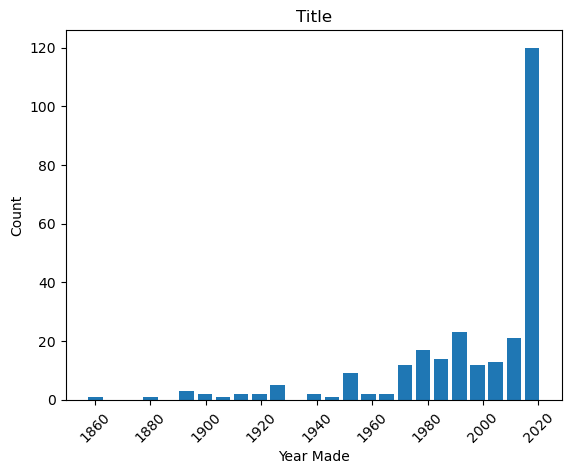

In [319]:
import matplotlib.pyplot as pyplot

val_list = list(with_year['year_made'])
pyplot.hist(val_list, bins=25, rwidth=0.8)
pyplot.xticks(rotation=45)
pyplot.title("Title")
pyplot.xlabel("Year Made")
pyplot.ylabel("Count")
pyplot.show()

In [321]:
df_year_count = with_year['year_made'].value_counts()
df_year_count = pd.DataFrame(df_year_count)

In [322]:
df_year_count.reset_index(inplace=True)

In [323]:
df_year_count

,index,year_made
0,2016,59
1,2021,22
2,2015,15
3,2017,8
4,2018,8
...,...,...
68,1979,1
69,1922,1
70,1966,1
71,1982,1


In [329]:
df_year_count1 =df_year_count.rename(columns={"year_made": "count"})
df_yr_count2 = df_year_count1.rename(columns={"index": "Year"})
# selecting rows based on condition 
df_yr_count3 = df_yr_count2[df_yr_count2['Year'] > 2004] 
df_yr_count4 = df_yr_count3[df_yr_count3['Year'] < 2018] 

In [340]:
df_filter1.to_csv('df_art.csv')

In [342]:
df_art = pd.read_csv("df_art.csv")

In [347]:
df_art.head(5)

,permalink,name,full_street_address,city,state,zip,county,address_1,address_2,latitude,longitude,website,place_attributes,artists,year_made,no_longer_on_display,neighborhoods,category,type
id,,,,,,,,,,,,,,,,,,,
9987,9987-934-mural-mentorship-program-group-mural-...,"""934 Mural Mentorship Program Group Mural"" (93...","926 Cleveland Ave, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,926 Cleveland Ave,NaN,39.9830,-82.9891,https://www.934fest.com/muralists/,[],[],2020.0,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na...",Mural,Public Art
9973,9973-a-hero-in-darkness-934-outdoor-gallery,"""A Hero in Darkness"" (934 Outdoor Gallery)","934 Cleveland Ave, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,934 Cleveland Ave,NaN,39.9831,-82.9892,https://www.934fest.com/muralists/,[],"[{'first_name': 'Andy', 'middle_name': '', 'la...",2020.0,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na...",Mural,Public Art
9989,9989-arise-934-outdoor-gallery,"""ARISE"" (934 Outdoor Gallery)","934 Cleveland Ave, Garage, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,934 Cleveland Ave,Garage,39.9831,-82.9892,https://www.934fest.com/muralists/,"[{'id': 1, 'name': 'Free Parking'}, {'id': 3, ...","[{'first_name': 'Sarah', 'middle_name': '', 'l...",2020.0,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na...",Mural,Public Art
9994,9994-ahmed-and-max-934-outdoor-gallery,"""Ahmed and Max"" (934 Outdoor Gallery)","579 E 3rd Ave, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,579 E 3rd Ave,NaN,39.9833,-82.9890,https://www.934fest.com/muralists/,[],"[{'first_name': 'Natalie', 'middle_name': '', ...",2020.0,True,"[{'id': 25, 'permalink': '25-milo-grogan', 'na...",Mural,Public Art
9972,9972-always-coming-back-home-to-you-934-outdoo...,"""Always Coming Back Home to You""- (934 Outdoor...","934 Cleveland Ave, Columbus, Ohio, 43201",Columbus,Ohio,43201,Franklin,934 Cleveland Ave,NaN,39.9831,-82.9892,https://www.934fest.com/muralists/,[],"[{'first_name': 'Monster', 'middle_name': 'Ste...",2020.0,False,"[{'id': 25, 'permalink': '25-milo-grogan', 'na...",Mural,Public Art


In [344]:
df_art = df_art.set_index("id")  

In [357]:
df_art['year_made'] = df_art['year_made'].astype(str)          
df_art['year_made'] = df_art['year_made'].str.replace('.0', '', regex=False)

In [365]:
with_year_a= df_art[~df_art['year_made'].isin(['nan'])]

In [366]:
with_year_a['year_made'] = with_year_a['year_made'].astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [367]:
len(with_year) #N=449

449

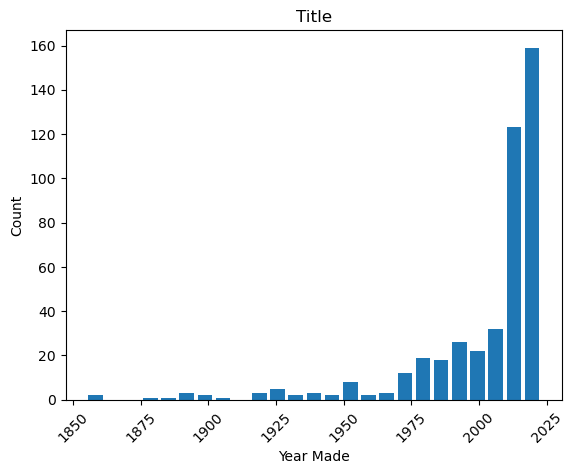

In [368]:
val_list = list(with_year_a['year_made'])
pyplot.hist(val_list, bins=25, rwidth=0.8)
pyplot.xticks(rotation=45)
pyplot.title("Title")
pyplot.xlabel("Year Made")
pyplot.ylabel("Count")
pyplot.show()

In [369]:
df_year_count_a = with_year['year_made'].value_counts()
df_year_count_a = pd.DataFrame(df_year_count_a)

In [372]:
df_year_count_a.reset_index(inplace=True)

In [373]:
df_year_count_a.head(5)

,index,year_made
0,2016,70
1,2020,62
2,2021,30
3,2019,24
4,2015,19


In [376]:
df_year_count_a1 =df_year_count_a.rename(columns={"year_made": "count"})
df_yr_count_a1 = df_year_count_a1.rename(columns={"index": "Year"})
# selecting rows based on condition 
df_yr_count_a2 = df_yr_count_a1[df_yr_count_a1['Year'] > 2004] 
df_yr_count_a3 = df_yr_count_a2[df_yr_count_a2['Year'] < 2018] 

In [378]:
df_yr_count_a3.head(5)

,Year,count
0,2016,70
4,2015,19
6,2017,18
7,2014,12
8,2013,8


In [379]:
df_yr_count_a3.to_csv('df_art_add.csv')

# Census

In [331]:
#print(os.getcwd())
os.chdir("/Users/margaretdemchak/Desktop/DA_401/data")
#print(os.getcwd())

In [426]:
acs_2005 = pd.read_csv("asc_dpo3_2005.csv")
acs_2006 = pd.read_csv("acs_dp03_2006.csv")
acs_2007 = pd.read_csv("acs_dp03_2007.csv")
acs_2008 = pd.read_csv("acs_dp03_2008.csv")
acs_2009 = pd.read_csv("acs_dp03_2009.csv")
acs_2010 = pd.read_csv("acs_dp03_2010.csv")
acs_2011 = pd.read_csv("acs_dp03_2011.csv")
acs_2012 = pd.read_csv("acs_dp03_2012.csv")
acs_2013 = pd.read_csv("acs_dp03_2013.csv")
acs_2014 = pd.read_csv("acs_dp03_2014.csv")
acs_2015 = pd.read_csv("acs_dp03_2015.csv")
acs_2016 = pd.read_csv("acs_dp03_2016.csv")
acs_2017 = pd.read_csv("asc_dpo3_2017.csv")
business = pd.read_csv("business_census.csv")

In [427]:
acs_2005=acs_2005.set_index('Year')
acs_2006=acs_2006.set_index('Year')
acs_2007=acs_2007.set_index('Year')
acs_2008=acs_2008.set_index('Year')
acs_2009=acs_2009.set_index('Year')
acs_2010=acs_2010.set_index('Year')
acs_2011=acs_2011.set_index('Year')
acs_2012=acs_2012.set_index('Year')
acs_2013=acs_2013.set_index('Year')
acs_2014=acs_2014.set_index('Year')
acs_2015=acs_2015.set_index('Year')
acs_2016=acs_2016.set_index('Year')
acs_2017=acs_2017.set_index('Year')

In [444]:
business_df= business[~business['Geographic Area Name'].isin(['Ohio'])]
business_df1= business_df[business['Meaning of NAICS Code'].isin(['Total for all sectors'])]
business_df2= business_df1[business['Meaning of Establishment age code'].isin(['Total'])]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [445]:
business_df3 = business_df2[business_df['Year'] > 2004] 
business_df4= business_df3[business_df1['Year'] < 2018] 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [446]:
business_df5=business_df4.set_index('Year')

In [447]:
business_df5

,Geographic Area Name,2017 NAICS Code,Meaning of NAICS Code,Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator,Meaning of Establishment age code,Number of firms,Number of establishments,Number of employees,(DHS) denominator,Number of establishments born during the last 12 months,...,Number of jobs lost from closing establishments during the last 12 months,Number of jobs lost from contracting establishments during the last 12 months,Rate of jobs lost from closing establishments during the last 12 months,Rate of jobs lost from contracting and closing establishments during the last 12 months,Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months,Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months,Rate of reallocation during the last 12 months,Number of firms that exited during the last 12 months,Number of establishments associated with firm deaths during the last 12 months,Number of employees associated with firm deaths during the last 12 months
Year,,,,,,,,,,,,,,,,,,,,,
2005,"Franklin County, Ohio",00,Total for all sectors,Total,Total,"19,226","25,657","581,629","580,721","2,687",...,"27,729","58,051",4.775,14.771,"1,455",0.251,29.543,"1,537","1,560","10,156"
2006,"Franklin County, Ohio",00,Total for all sectors,Total,Total,"19,395","26,049","589,335","586,001","2,987",...,"33,702","55,081",5.751,15.151,"5,820",0.993,30.301,"1,559","1,617","13,244"
2007,"Franklin County, Ohio",00,Total for all sectors,Total,Total,"19,242","25,917","593,392","591,499","2,911",...,"32,632","54,575",5.517,14.743,"3,949",0.668,29.487,"1,668","1,699","11,063"
2008,"Franklin County, Ohio",00,Total for all sectors,Total,Total,"18,921","25,352","588,858","590,944","2,431",...,"27,306","59,261",4.621,14.649,"−4,262",−0.721,27.855,"1,666","1,705","11,170"
2009,"Franklin County, Ohio",00,Total for all sectors,Total,Total,"18,547","25,232","571,148","581,176","2,588",...,"30,397","62,973",5.230,16.066,"−20,483",−3.524,25.083,"1,625","1,677","10,365"
2010,"Franklin County, Ohio",00,Total for all sectors,Total,Total,"18,229","24,878","558,971","564,388","2,134",...,"20,000","55,925",3.544,13.453,"−11,105",−1.968,22.970,"1,436","1,494","10,403"
2011,"Franklin County, Ohio",00,Total for all sectors,Total,Total,"18,315","24,542","561,832","559,480","2,310",...,"26,141","44,749",4.672,12.671,"4,711",0.842,25.341,"1,333","1,362","8,990"
2012,"Franklin County, Ohio",00,Total for all sectors,Total,Total,"18,439","24,728","592,918","577,387","2,350",...,"17,713","43,156",3.068,10.542,"31,994",5.541,21.084,"1,198","1,219","7,837"
2013,"Franklin County, Ohio",00,Total for all sectors,Total,Total,"18,663","25,020","598,705","596,109","2,406",...,"21,696","55,041",3.640,12.873,"5,204",0.873,25.746,"1,171","1,194","8,224"


In [448]:
frames = [acs_2005,acs_2006,acs_2007,acs_2008,acs_2009,acs_2010,acs_2011,acs_2012,acs_2013,acs_2014,acs_2015,acs_2016,acs_2017]
result = pd.concat(frames, axis=0)

In [449]:
result.head(5) #N=1101 columns
#result.to_csv('concat_acs.csv')
df_acs=result.dropna(axis='columns')
df_acs #N=227 columns

,NAME,GEO_ID,DP03_0001E,DP03_0001M,DP03_0002E,DP03_0002M,DP03_0003E,DP03_0003M,DP03_0004E,DP03_0004M,...,DP03_0108M,DP03_0109E,DP03_0109M,DP03_0110E,DP03_0110M,DP03_0111E,DP03_0111M,DP03_0112E,DP03_0112M,state
Year,,,,,,,,,,,,,,,,,,,,,
2005,"Franklin County, Ohio",0500000US39049,821693,1390,574487,5417,573180,5495,533343,5956,...,0.7,13.0,0.8,10.2,1.4,11.9,1.1,23.7,1.4,39
2006,"Franklin County, Ohio",0500000US39049,844891,1589,589534,5948,588834,6062,546414,6809,...,0.8,15.4,0.9,8.5,1.4,12.8,1.2,27.7,1.8,39
2007,"Franklin County, Ohio",0500000US39049,862016,1471,594042,8102,593429,8009,556397,8631,...,3.5,20.3,2.4,14.5,1.0,15.3,1.0,9.2,1.9,39
2008,"Franklin County, Ohio",0500000US39049,869414,1423,616884,6859,615348,6803,579730,6309,...,4.0,16.3,2.7,13.4,0.8,13.8,0.9,11.1,1.4,39
2009,"Franklin County, Ohio",0500000US39049,903198,1327,630708,7449,629157,7385,573111,7933,...,2.5,35.2,3.0,43.7,3.7,43.8,8.7,18.2,0.9,39
2010,"Franklin County, Ohio",0500000US39049,916195,1841,646458,7356,645995,7316,573927,7135,...,5688.0,67952.0,4451.0,35877.0,3533.0,21305.0,2053.0,15153.0,2385.0,39
2011,"Franklin County, Ohio",0500000US39049,926819,1559,637794,7615,637117,7604,578063,7820,...,5368.0,55054.0,4057.0,31212.0,2985.0,18058.0,2570.0,13918.0,2416.0,39
2012,"Franklin County, Ohio",0500000US39049,926819,1559,637794,7615,637117,7604,578063,7820,...,5368.0,55054.0,4057.0,31212.0,2985.0,18058.0,2570.0,13918.0,2416.0,39
2013,"Franklin County, Ohio",0500000US39049,953948,1571,662300,7438,661174,7511,617597,8509,...,5756.0,40273.0,4020.0,23858.0,2623.0,13715.0,1798.0,10540.0,2121.0,39


In [450]:
#df_acs=result_dropna.rename(columns={'DP03_0001E': 'employment_ageover16', 'DP03_0001M': 'employment_ageover16_moe','DP03_0002E': 'employment_ageover16_labor'}, inplace=True)

In [451]:
df_acs_art=df_acs.merge(df_yr_count_a3, on='Year')
df_acs_busi_art= df_acs_art.merge(business_df3, on='Year')

In [455]:
df_acs_busi_art.to_csv('df_acs_busi_art.csv')

In [456]:
df_acs_busi_art

,Year,NAME,GEO_ID,DP03_0001E,DP03_0001M,DP03_0002E,DP03_0002M,DP03_0003E,DP03_0003M,DP03_0004E,...,Number of jobs lost from closing establishments during the last 12 months,Number of jobs lost from contracting establishments during the last 12 months,Rate of jobs lost from closing establishments during the last 12 months,Rate of jobs lost from contracting and closing establishments during the last 12 months,Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months,Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months,Rate of reallocation during the last 12 months,Number of firms that exited during the last 12 months,Number of establishments associated with firm deaths during the last 12 months,Number of employees associated with firm deaths during the last 12 months
0,2005,"Franklin County, Ohio",0500000US39049,821693,1390,574487,5417,573180,5495,533343,...,"27,729","58,051",4.775,14.771,"1,455",0.251,29.543,"1,537","1,560","10,156"
1,2006,"Franklin County, Ohio",0500000US39049,844891,1589,589534,5948,588834,6062,546414,...,"33,702","55,081",5.751,15.151,"5,820",0.993,30.301,"1,559","1,617","13,244"
2,2007,"Franklin County, Ohio",0500000US39049,862016,1471,594042,8102,593429,8009,556397,...,"32,632","54,575",5.517,14.743,"3,949",0.668,29.487,"1,668","1,699","11,063"
3,2008,"Franklin County, Ohio",0500000US39049,869414,1423,616884,6859,615348,6803,579730,...,"27,306","59,261",4.621,14.649,"−4,262",−0.721,27.855,"1,666","1,705","11,170"
4,2009,"Franklin County, Ohio",0500000US39049,903198,1327,630708,7449,629157,7385,573111,...,"30,397","62,973",5.230,16.066,"−20,483",−3.524,25.083,"1,625","1,677","10,365"
5,2010,"Franklin County, Ohio",0500000US39049,916195,1841,646458,7356,645995,7316,573927,...,"20,000","55,925",3.544,13.453,"−11,105",−1.968,22.970,"1,436","1,494","10,403"
6,2011,"Franklin County, Ohio",0500000US39049,926819,1559,637794,7615,637117,7604,578063,...,"26,141","44,749",4.672,12.671,"4,711",0.842,25.341,"1,333","1,362","8,990"
7,2012,"Franklin County, Ohio",0500000US39049,926819,1559,637794,7615,637117,7604,578063,...,"17,713","43,156",3.068,10.542,"31,994",5.541,21.084,"1,198","1,219","7,837"
8,2013,"Franklin County, Ohio",0500000US39049,953948,1571,662300,7438,661174,7511,617597,...,"21,696","55,041",3.640,12.873,"5,204",0.873,25.746,"1,171","1,194","8,224"
9,2014,"Franklin County, Ohio",0500000US39049,968163,1606,679335,6117,679051,6108,638469,...,"18,435","49,693",3.046,11.257,"11,430",1.889,22.514,"1,184","1,209","8,651"
